# Informacje

Ten notebook omawia przykłady, o których rozmawialiśmy podczas dzisiejszych ćwiczeń w sali bez projektora :) Jest też przykładem w jaki sposób możecie Państwo poukładać analizę danych w formę raportu.

Proszę zwrócić uwagę na przeplatanie tekstu i kodu, oraz osadzanie obrazków i wykresów.

Miłej lektury i - ponownie - spokojnych Świąt.

# Import potrzebnych bibliotek i przygotowanie techniczne

Pakiety do manipulacji danymi

In [1]:
import pandas as pd
import numpy as np

Pakiety do testów statystycznych

In [2]:
import scipy.stats as st


Pakiety do wizualizacji danych

In [3]:
from pivottablejs import pivot_ui

In [4]:
from matplotlib import pyplot as plt

Poniżej komenda wymagana do działania matplotliba wewnątrz notebooka:

In [5]:
%matplotlib inline

# Wczytywanie danych

In [6]:
titanic_data = pd.read_csv("./titanic_train_data.csv", index_col=None)

Poniżej sprawdzamy dane - jak wyglądają, czy wszystko zostało wczytane poprawnie

In [7]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Oczyszczanie danych i dodanie nowych kolumn

Zamiana kolumny opisującej płeć na wartości binarne: 1 - jeśli kobieta, 0 jeśli mężczyzna

In [9]:
is_female = titanic_data.Sex == "female"

In [10]:
titanic_data["is_female"] = is_female

Wyznaczenie tytułów pasażerów, w oparciu o pełne imię i nazwisko. 

Poniższy przykład pokazuje, jak możecie Państwo zdefiniować własne funkcje przekazywane do standardowych metod w Pandas:

In [11]:
titles = titanic_data.apply(lambda x: x.Name.split(",")[1].split(".")[0].strip(), axis=1)

In [12]:
titles.head(4)

0      Mr
1     Mrs
2    Miss
3     Mrs
dtype: object

In [13]:
titanic_data['Title'] = titles

Dodawanie kolumny opisującej wielkość rodziny

In [14]:
family_size = titanic_data.apply(lambda x: x.SibSp+x.Parch, axis=1)

In [15]:
family_size.head(4)

0    1
1    1
2    0
3    1
dtype: int64

In [16]:
titanic_data['family_size'] = family_size

# Przegląd danych

* Przegląd częstości występowania różnych wartości numerycznych - np. wielkości rodziny

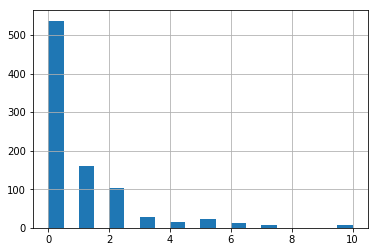

In [20]:
titanic_data.family_size.hist(bins=20)

In [21]:
pd.value_counts(titanic_data.family_size)

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64

* Sprawdzenie częstości występowania poszczególnych tytułów:

In [22]:
pd.value_counts(titanic_data.Title)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Capt              1
Sir               1
Lady              1
Ms                1
the Countess      1
Jonkheer          1
Don               1
Name: Title, dtype: int64

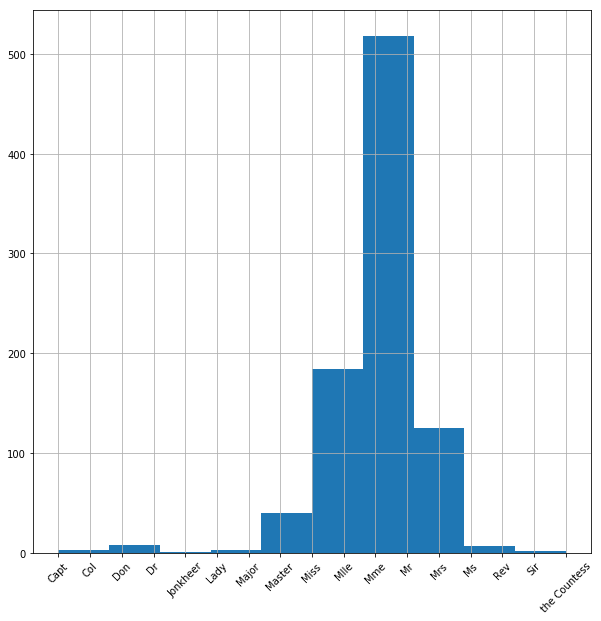

In [25]:
titanic_data.Title.hist(xrot=45, figsize=(10, 10)) # parametr X-rot obraca etykiety zmiennej o X stopni

Podlgąd danych z użyciem funkcji Pivottable - generiującej (podobną do Excela) tabelę przestawną

In [21]:
pivot_ui(titanic_data)

Wykres bąbelkowy - na osi y - wielkość rodziny, na osi x: wiek. Rozmiar kulki - kwota, jaką zapłacono za bilet

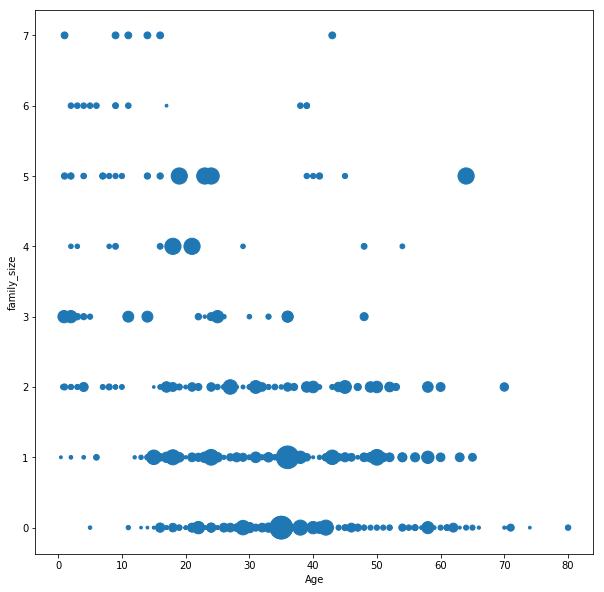

In [29]:
titanic_data.plot.scatter(x='Age', y='family_size', s=titanic_data.Fare, figsize=(10,10))

## Przykład grupowania

* Pogrupujemy obserwacje (osoby) wg. tytułu przed nazwiskiem i porównamy średnią wieku mężczyzn (Mr.) i pań (Mrs.) oraz młodych kobiet (Miss)

In [23]:
grouped_by_title = titanic_data.groupby(by="Title")

Przeprowadzenie testu t-studenta, w celu sprawdzenia istontości różnicy wieku

Szybki podgląd grupy mężczyzn

In [24]:
grouped_by_title.get_group("Mr").head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,Title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,Mr,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False,Mr,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,False,Mr,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,False,Mr,6
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,False,Mr,0
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,False,Mr,0
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,False,Mr,0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,False,Mr,0


Szybki podgląd różnicy wieku pomiędzy grupami. Każde pudełko reprezentuje jedną grupę, a jego elementy oznaczają:
* Podstawa pudełka - 25 percentyl (25% danych)
* Środkowa kreska - mediana
* Góra pudełka - 75 percentyl
* Kropki - punkty (obserwacje) odstające - wyjątkowo duże/małe wyniki

C:\Users\fwojcik\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


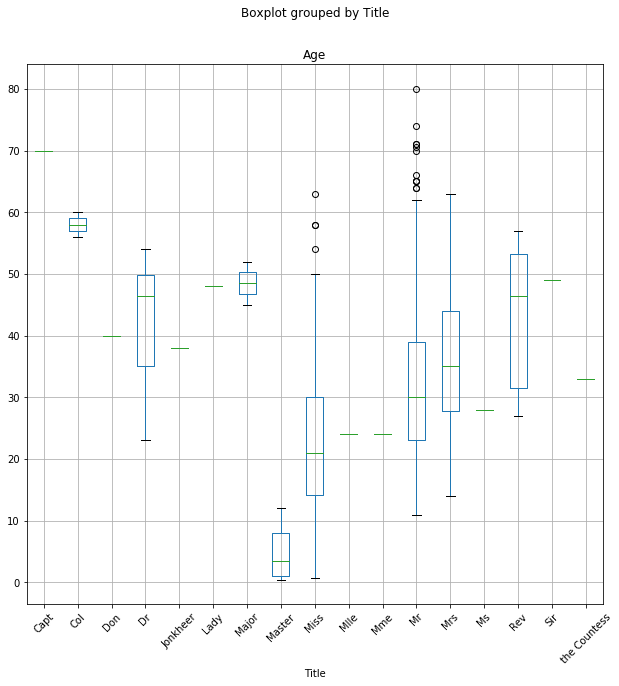

In [25]:
titanic_data.boxplot(by="Title", column="Age", figsize=(10,10), rot=45)

Test istotności statystycznej w porównywaniu średniego wieku mężczyzn i kobiet. Punkty do zwrócenia uwagi:
* ze względu na brakujące wartości doatno parametr nan_policy="omit", czyli pominięcie brakujących rekordów
* Domyślny poziom istotności to 0.05. Czyli jeśl p-wartość jest mniejsza niż 0.05 to różnica jest istotna statystycznie

In [33]:
v1 = np.array([10, 12, 13, 15])
v2 = np.array([12, 13, 13, 14])

st.ttest_ind(v1, v2)

Ttest_indResult(statistic=-0.44721359549995793, pvalue=0.67041212265950312)

In [34]:
v1.mean()

12.5

In [35]:
v2.mean()

13.0

In [26]:
st.ttest_ind(grouped_by_title.get_group("Mr").Age, grouped_by_title.get_group("Mrs").Age, nan_policy="omit", )

Ttest_indResult(statistic=-2.6135180881439988, pvalue=0.0092294147408371087)

P-wartość testu to 0.009, jest to wartość mniejsza niż założone 0.05, czyli przyjmujemy, że zachodzi różnica wieku pomiędzy kobietami a mężczyznami.

# Modelowanie

## Klasyfikacja

Spróbujemy zaklasyfikować pasażerów - tych, którzy przeżyli i tych, którzy zginęli. Użyjemy tylko kilku zmiennych objaśniających, żeby nie komplikować sprawy.

Takie podejście mogą Państwo zastosować do dowolnych danych i problemów klasyfikacji

In [36]:
# Kolumny, których użyjemy do modelowania
columns =['Fare', 'family_size', 'Title', 'is_female'] 

# Pobieramy zmienną ZALEŻNĄ
y = titanic_data.Survived

# Tworzymy macierz zmiennych niezależnych
X = titanic_data[columns]

# Zamiana zmiennych tekstowych na binarne:
X = pd.get_dummies(X)

Poniżej opis procesu (wraz z komentarzem) modelowania - krok po kroku, wraz z biliotekami i importami

In [54]:
# pobranie klasyfikatora - np. drzewa decyzyjnego. Może być dowolny inny
from sklearn.tree import DecisionTreeClassifier

# podział zbioru na uczący i testowy
from sklearn.model_selection import train_test_split 

# metryki klasyfikacji
from sklearn.metrics import classification_report, accuracy_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80       148
          1       0.78      0.67      0.72       120

avg / total       0.77      0.77      0.77       268



In [56]:
accuracy_score(y_true=y_test, y_pred=pred)

0.76865671641791045

In [50]:
y_test.head(5)

531    0
758    0
256    1
340    1
238    0
Name: Survived, dtype: int64

In [52]:
pred[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [47]:
from sklearn.linear_model import LogisticRegression



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg = LogisticRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))




             precision    recall  f1-score   support

          0       0.81      0.84      0.83       161
          1       0.75      0.71      0.73       107

avg / total       0.79      0.79      0.79       268



In [48]:
from sklearn.ensemble import RandomForestClassifier



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))




             precision    recall  f1-score   support

          0       0.87      0.87      0.87       165
          1       0.80      0.80      0.80       103

avg / total       0.84      0.84      0.84       268

